In [81]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt


In [50]:
df = pd.read_csv('D:\Projects\Machine Learning_022019\Source\kc_house_data.csv')

In [51]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [52]:
#checking the number of row and columns in the data 
df.shape 


(21613, 21)

In [53]:
#Data types in the data 
df.dtypes
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [54]:
#select the data on bais of data type and getting the columns name
df.select_dtypes(include=['O',])
df.select_dtypes(include=['O',]).columns
df.select_dtypes(include=['O',]).columns.tolist()

['date']

In [55]:
print(df.isnull().any().sum(), ' / ', df.shape[1])
print(df.isnull().any(axis=1).sum(), ' / ', df.shape[0])

0  /  21
0  /  21613


In [56]:
#features  = df.iloc[:,3:].columns.tolist()
features  = df.iloc[:,3:].columns.tolist()

In [57]:
target = df.iloc[:,2].name

In [106]:
#calculate correlation between target and all features 
corr = {}

for feature in features:
    x = df[feature]
    y = df[target]
    key = feature 
    correlation = pearsonr(x,y)
    #print(correlation)
    corr[key]= correlation[0]




In [107]:
data_correlations = pd.DataFrame(list(corr.items()), columns = ['feautes and target','corr'])


In [108]:
data_correlations['corr'] = data_correlations['corr'].abs()

In [109]:
data_correlations =data_correlations.sort_values('corr',ascending=False).iloc[:5,:].reset_index(drop=True)

In [114]:
top_5_features = data_correlations.iloc[:,0]

In [116]:
top_5_features = list(top_5_features)

['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms']

In [119]:
target = list(df.iloc[:,2].values)

In [140]:
def plot_features_target(top_5_features,target,df):
    x = []
    for feature in top_5_features:
        x.append(list(df[feature]))
    for i in range(len(x)):
        plt.figure()
        plt.scatter(x[i],target)
        plt.xlabel(top_5_features[i])
        plt.ylabel('Price')
        
    

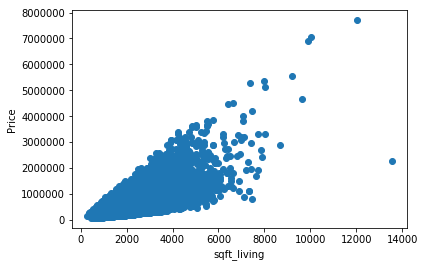

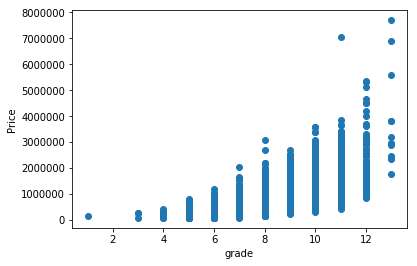

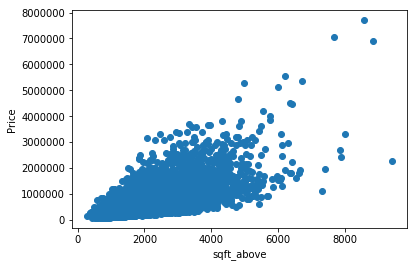

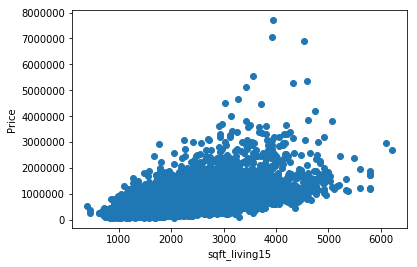

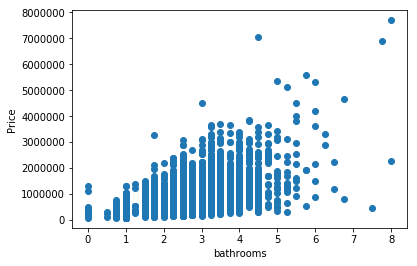

In [141]:
plot_features_target(top_5_features,target,df)